In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./data/nyt1.csv')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458441 entries, 0 to 458440
Data columns (total 5 columns):
Age            458441 non-null int64
Gender         458441 non-null int64
Impressions    458441 non-null int64
Clicks         458441 non-null int64
Signed_In      458441 non-null int64
dtypes: int64(5)
memory usage: 17.5 MB
None


In [5]:
df.head(4)

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1


In [6]:
len(df)

458441

In [7]:
df2 = df[df.Impressions > 0]

In [8]:
len(df) - len(df2)

3066

In [9]:
df2['CTR'] = df['Clicks'] / df['Impressions']

/home/archon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
df2.head()

,Age,Gender,Impressions,Clicks,Signed_In,CTR
0,36,0,3,0,1,0.0
1,73,1,3,0,1,0.0
2,30,0,3,0,1,0.0
3,49,1,3,0,1,0.0
4,47,1,11,0,1,0.0


<IPython.core.display.Javascript object>


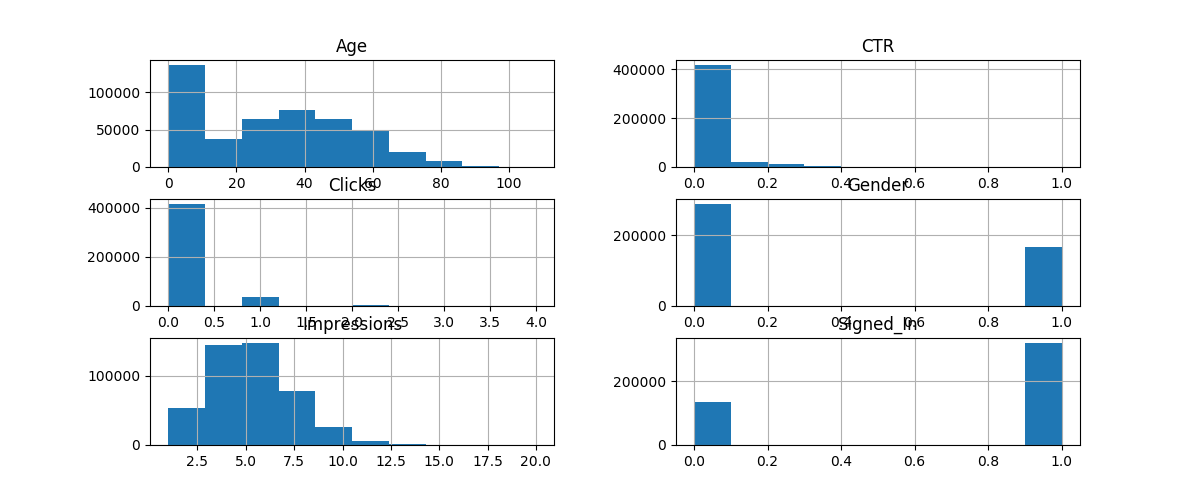

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7bb2278c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7bb1dcc9d0>]], dtype=object)

In [11]:
df2.hist(figsize=(12,5))

In [12]:
dfIn = df2[df2['Signed_In'] == 1]
dfNotIn = df2[df2['Signed_In'] == 0]

<IPython.core.display.Javascript object>


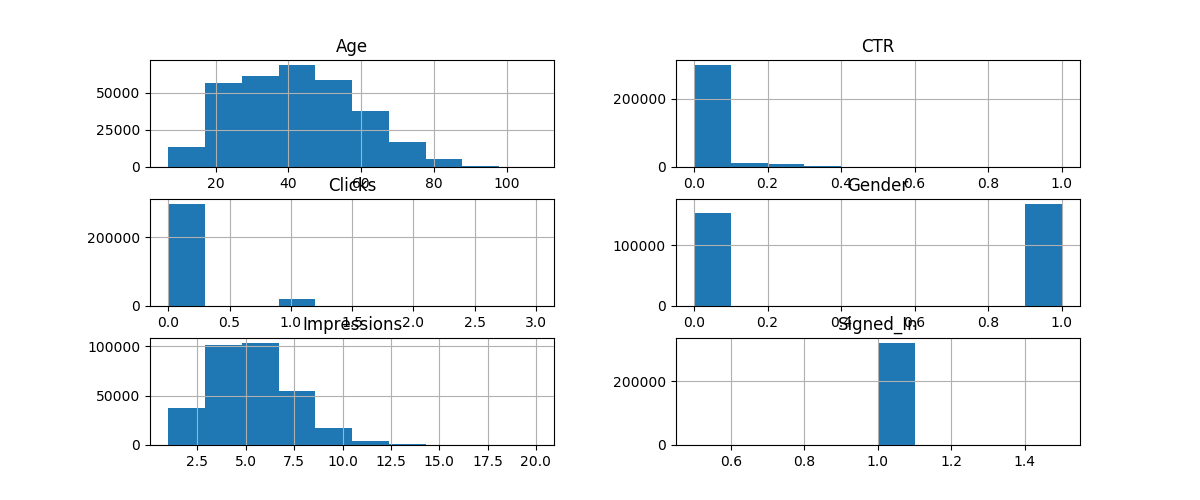

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7bb1b23050>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7bb17db610>]], dtype=object)

In [13]:
dfIn.hist(figsize=(12,5))

<IPython.core.display.Javascript object>


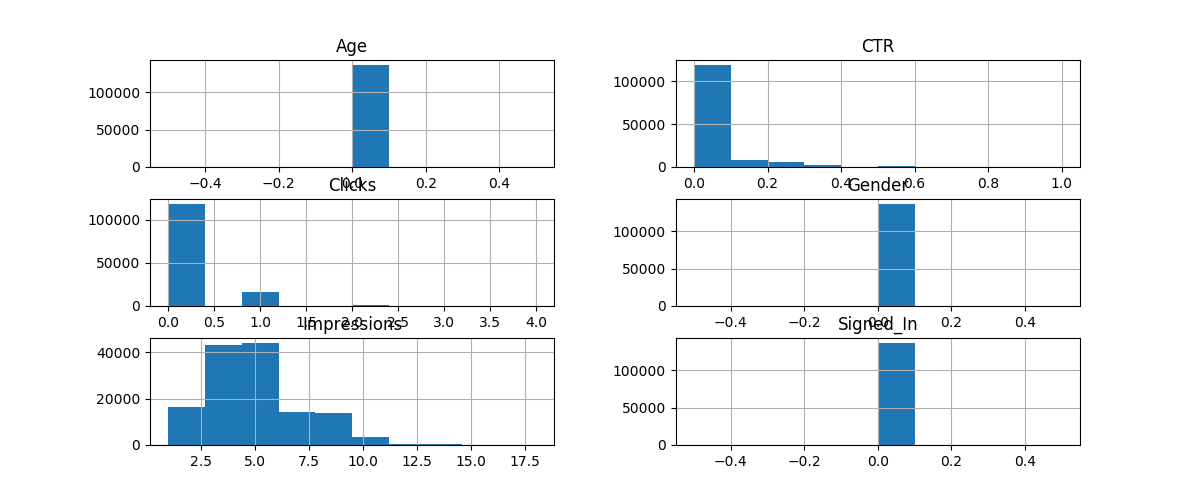

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7bae6648d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7bae35c510>]], dtype=object)

In [14]:
dfNotIn.hist(figsize=(12,5))

In [19]:
from scipy import stats

In [29]:
print(stats.ttest_ind(dfIn['CTR'], dfNotIn['CTR'], equal_var=False))

Ttest_indResult(statistic=-55.376117934260868, pvalue=0.0)


Huge difference, statistically different *or* problem with calculations...

## 7

In [21]:
df_male_signed_in = dfIn[dfIn['Gender'] == 1]
df_female_signed_in = dfIn[dfIn['Gender'] == 0]

In [22]:
print(stats.ttest_ind(df_male_signed_in['CTR'].values, df_female_signed_in['CTR'].values, equal_var=False))

Ttest_indResult(statistic=-3.2897560659351059, pvalue=0.0010028527313147612)


## 8

<https://stackoverflow.com/questions/23450735/categorical-variables-in-a-pandas-dataframe>

In [26]:
bins = [0, 18, 24, 34, 44, 54, 64, 1000]
group_names = ['(7, 18]', '(18, 24]', '(24, 34]', '(34, 44]', '(44, 54]', '(54, 64]', '(64, 1000]']

dfIn['AgeGroup'] = pd.cut(dfIn['Age'], bins, labels=group_names)

/home/archon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


**Note**: Do not know the whys and how to fix the warning above ⇈⇈

In [28]:
dfIn.head(10)

,Age,Gender,Impressions,Clicks,Signed_In,CTR,AgeGroup
0,36,0,3,0,1,0.000000,"(34, 44]"
1,73,1,3,0,1,0.000000,"(64, 1000]"
2,30,0,3,0,1,0.000000,"(24, 34]"
3,49,1,3,0,1,0.000000,"(44, 54]"
4,47,1,11,0,1,0.000000,"(44, 54]"
5,47,0,11,1,1,0.090909,"(44, 54]"
7,46,0,5,0,1,0.000000,"(44, 54]"
8,16,0,3,0,1,0.000000,"(7, 18]"
9,52,0,4,0,1,0.000000,"(44, 54]"
11,21,0,3,0,1,0.000000,"(18, 24]"


## 9 Stopping short in theory